In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Reading the csv file

In [2]:
gp_df = pd.read_csv('GP Orders - 5.csv', parse_dates=['Order Date & Time'])
print("Data shape is : ", gp_df.shape)
print("Columns : ", gp_df.columns, "\n")
gp_df.head()

Data shape is :  (19239, 8)
Columns :  Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object') 



,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0


The dataset has 19239 rows & 8 columns.

In [3]:
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Number          19239 non-null  int64         
 1   Order Status          19239 non-null  object        
 2   Book Name             19237 non-null  object        
 3   Order Date & Time     19239 non-null  datetime64[ns]
 4   City                  19238 non-null  object        
 5   Payment Method        19229 non-null  object        
 6   Total items           19239 non-null  int64         
 7   Total weight (grams)  19239 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


## Changing the column names for simplicity in code manipulation
and splitting the "Order Date & Time" column for later purpose

In [4]:
gp_df.rename(columns={'Order Number':'order_no', 'Order Status':'order_status', 'Book Name':'book_name', 
                      'Order Date & Time':'order_date_time', 'City':'city', 'Payment Method':'payment_method', 'Total items':'total_item', 
                      'Total weight (grams)':'total_weight_gm'}, inplace=True)
gp_df['date'] = gp_df['order_date_time'].dt.date
gp_df['time'] = gp_df['order_date_time'].dt.time
gp_df['month_year'] = gp_df['order_date_time'].dt.to_period('M')

In [5]:
gp_df.drop(['order_date_time'], axis=1, inplace=True)
gp_df

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
1,308,Completed,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,15:54:00,2019-10
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
3,310,Cancelled,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,16:42:00,2019-10
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Karachi,Cash on Delivery (COD),1,200.0,2019-10-03,16:44:00,2019-10
...,...,...,...,...,...,...,...,...,...,...
19234,71332,Completed,Linux - An Introduction,Lahore,Cash on delivery,1,200.0,2021-01-25,12:46:00,2021-01
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,Lahore,Cash on delivery,4,200.0,2021-01-25,14:06:00,2021-01
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",Larkana,Cash on delivery,2,500.0,2021-01-25,16:37:00,2021-01
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,"Mailsi, district Vehari",Cash on delivery,10,400.0,2021-01-25,18:01:00,2021-01


Taking look at the "**book_name**" column above, we see that in each order if multiple books are ordered then the **books name are concatenated with a "/" symbol** (for eg. see the 'book_name' column for indexes 2, 19235, 19237...). So to know the number of each books sold, we need to split the individual book name from the "book_name" column.
## Splitting indiviual book names from Orders

In [6]:
gp_df1 = gp_df.assign(book_name=gp_df['book_name'].str.split('/')).explode('book_name')
gp_df1.reset_index(drop=True)

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
1,308,Completed,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,15:54:00,2019-10
2,309,Completed,Kaggle for Begginers,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
3,309,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
4,310,Cancelled,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,16:42:00,2019-10
...,...,...,...,...,...,...,...,...,...,...
33250,71420,Completed,Kaggle for Begginers,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33251,71420,Completed,Artificial Intelligence,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33252,71420,Completed,ایک تھا الگورتھم,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33253,71420,Completed,R ka Taaruf,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01


## • What is the best-selling book?

In [7]:
gp_df1.loc[:, ['book_name', 'order_status']].value_counts()

book_name                               order_status
انٹرنیٹ سے پیسہ کمائیں                  Completed       3020
Python Programming                      Completed       2223
Artificial Intelligence                 Completed       1995
Blockchain, Cryptocurrency And Bitcoin  Completed       1719
Product Management                      Completed       1492
                                                        ... 
Kamyabi Mubarak                         Returned           1
Kamyab Log                              Cancelled          1
Kaleesa                                 Completed          1
Kalam sultan baho                       Completed          1
LABBAIK                                 Returned           1
Length: 2098, dtype: int64

### From the above analysis, we conclude that the book entitled as "ا**نٹرنیٹ سے پیسہ کمائیں**" 
is the highest selling book having a **total of 3020 successful orders**

Now let us find the top 10 selling books

In [8]:
gp_df2 = gp_df1[['date', 'book_name', 'order_status']]

# Here, keeping only the rows of dataframe gp_df2 having successful orders(i.e completed order) 
# & deleting the other records (i.e Returned and Cancelled)
gp_df2 = gp_df2[(gp_df2.order_status == 'Completed')]
gp_df2.drop(columns=['order_status'], inplace=True)
topbooks = gp_df2.book_name.value_counts()[:10].index.tolist()
topbooks

['انٹرنیٹ سے پیسہ کمائیں',
 'Python Programming',
 'Artificial Intelligence',
 'Blockchain, Cryptocurrency And Bitcoin',
 'Product Management',
 'Justju ka safar-1',
 'ڈیٹا سائنس',
 'مشین لرننگ',
 'Sukkur To Florida',
 '(C++)']

In [9]:
books_order_on_date = pd.DataFrame(gp_df2.groupby('date')['book_name'].value_counts())
books_order_on_date.rename(columns={'book_name': 'no_of_orders'}, inplace=True)
books_order_on_date.reset_index(inplace= True)

In [10]:
top_book_orders = books_order_on_date.loc[(books_order_on_date.book_name == topbooks[0]), ['date', 'no_of_orders']]
top_book_orders

,date,no_of_orders
5426,2020-10-21,2
5449,2020-10-22,8
5469,2020-10-23,127
5501,2020-10-24,200
5534,2020-10-25,60
...,...,...
9469,2021-01-21,1
9473,2021-01-22,2
9488,2021-01-23,4
9501,2021-01-24,1


In [11]:
fig = make_subplots(rows=10, cols=1)
i=0

for book in topbooks:
    top_book_orders = books_order_on_date.loc[(books_order_on_date.book_name == book), ['date', 'no_of_orders']]
#     fig = px.line(top_book_orders, x='date', y='no_of_orders', markers=True)
    fig.add_trace(
        go.Scatter(x=top_book_orders['date'], y=top_book_orders['no_of_orders'], name=book, mode='lines+markers',), 
        row=i+1, col=1)
    
    i = i + 1
    
fig.update_layout(height=1000, width=1000, title_text="Sales Trend => Top Ten Books")    
fig.show()

In [12]:
fig = px.line(top_book_orders, x='date', y='no_of_orders', markers=True)
fig.show()

## • Visualize order status frequency
Let us see the Order Status of entire dataset to have an overview of how much % orders are ***Completed, Returned or Cancelled***

In [13]:
print(gp_df['order_status'].value_counts())
print('_'*40, "\nOrder Status      %")
gp_df['order_status'].value_counts(normalize=True)

Completed    17948
Returned      1142
Cancelled      149
Name: order_status, dtype: int64
________________________________________ 
Order Status      %


Completed    0.932897
Returned     0.059359
Cancelled    0.007745
Name: order_status, dtype: float64

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='order_status', ylabel='count'>

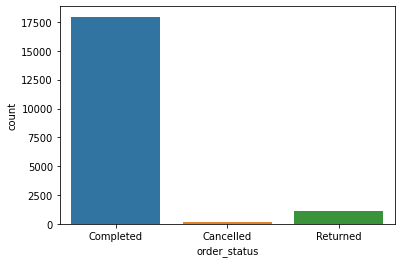

In [14]:
sns.countplot(gp_df.order_status)

In [15]:
order_on_date = gp_df.date.value_counts().rename_axis('date').reset_index(name='no_of_orders')
order_on_date.sort_values(by=['date'], inplace=True)

In [16]:
fig = px.line(order_on_date, x='date', y='no_of_orders', markers=True)
fig.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='date', ylabel='count'>

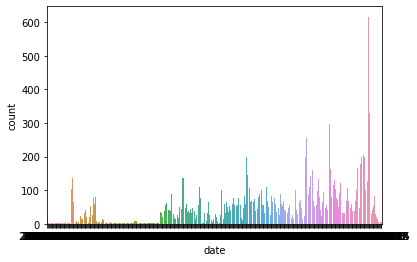

In [17]:
sns.countplot(gp_df.date)

## • Find a correlation between date and time with order status
• Find a correlation between city and order status
• Find any hidden patterns that are counter-intuitive for a layman
• Can we predict number of orders, or book names in advance?

In [18]:
correlation = gp_df.corr()

<AxesSubplot:>

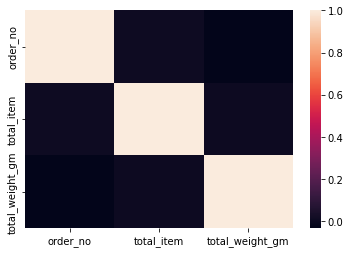

In [19]:
sns.heatmap(correlation)